In [1]:
# Author: Kristine M. L. Krighaar
# Niels Bohr Institute, University of Copenhagen
#
# This notebook should run in NCCO_Env 

from KGS import *
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#0072BD','#D95319', '#c348db','#77AC30','#4DBEEE'])
mpl.rcParams['lines.markersize'] = 6

# Suseptibility Raw data

In [2]:
Ag_sus = pd.read_csv('SQUID_Uterecht_data/20240222_NCCO_AG.dat', header=20, na_values=[''])
UBC_sus = pd.read_csv('SQUID_Uterecht_data/20240223_NCCO_SC_Canada4_full_size.dat', header=20, na_values=[''])
KU_sus = pd.read_csv('SQUID_Uterecht_data/20240226_NCCO_P_Copenhagen_annealed.dat', header=20, na_values=[''])

print(UBC_sus)

             Time  Comment  Field (Oe)  Temperature (K)  Long Moment (emu)  \
0    1.708724e+09      NaN        10.0         1.800814          -0.211449   
1    1.708724e+09      NaN        10.0         2.343911          -0.211476   
2    1.708724e+09      NaN        10.0         2.847054          -0.211488   
3    1.708724e+09      NaN        10.0         3.168666          -0.211482   
4    1.708724e+09      NaN        10.0         3.758556          -0.211477   
..            ...      ...         ...              ...                ...   
189  1.708770e+09      NaN        10.0        47.993290           0.001147   
190  1.708770e+09      NaN        10.0        48.502520           0.001138   
191  1.708770e+09      NaN        10.0        48.998110           0.001131   
192  1.708770e+09      NaN        10.0        49.503940           0.001123   
193  1.708770e+09      NaN        10.0        50.006730           0.001116   

     Long Scan Std Dev  Long Algorithm  Long Reg Fit  Long Perc

In [3]:
plt.rcParams.update({
    'figure.figsize': (3.5, 2.5),     # Width x Height in inches for single plots
    'font.size': 10,                  # Base font size
    'axes.labelsize': 10,             # Label font size
    'xtick.labelsize': 8,             # X-axis tick label size
    'ytick.labelsize': 8,             # Y-axis tick label size
    'legend.fontsize': 8,             # Legend font size
    'axes.titlesize': 10,             # Title font size
    'figure.dpi': 300,                # Dots per inch for high-quality output
    'savefig.dpi': 300,
    'font.family': 'serif',    # Use serif font to match many article styles
    'lines.linewidth': 1.5                # DPI for saving figures
})

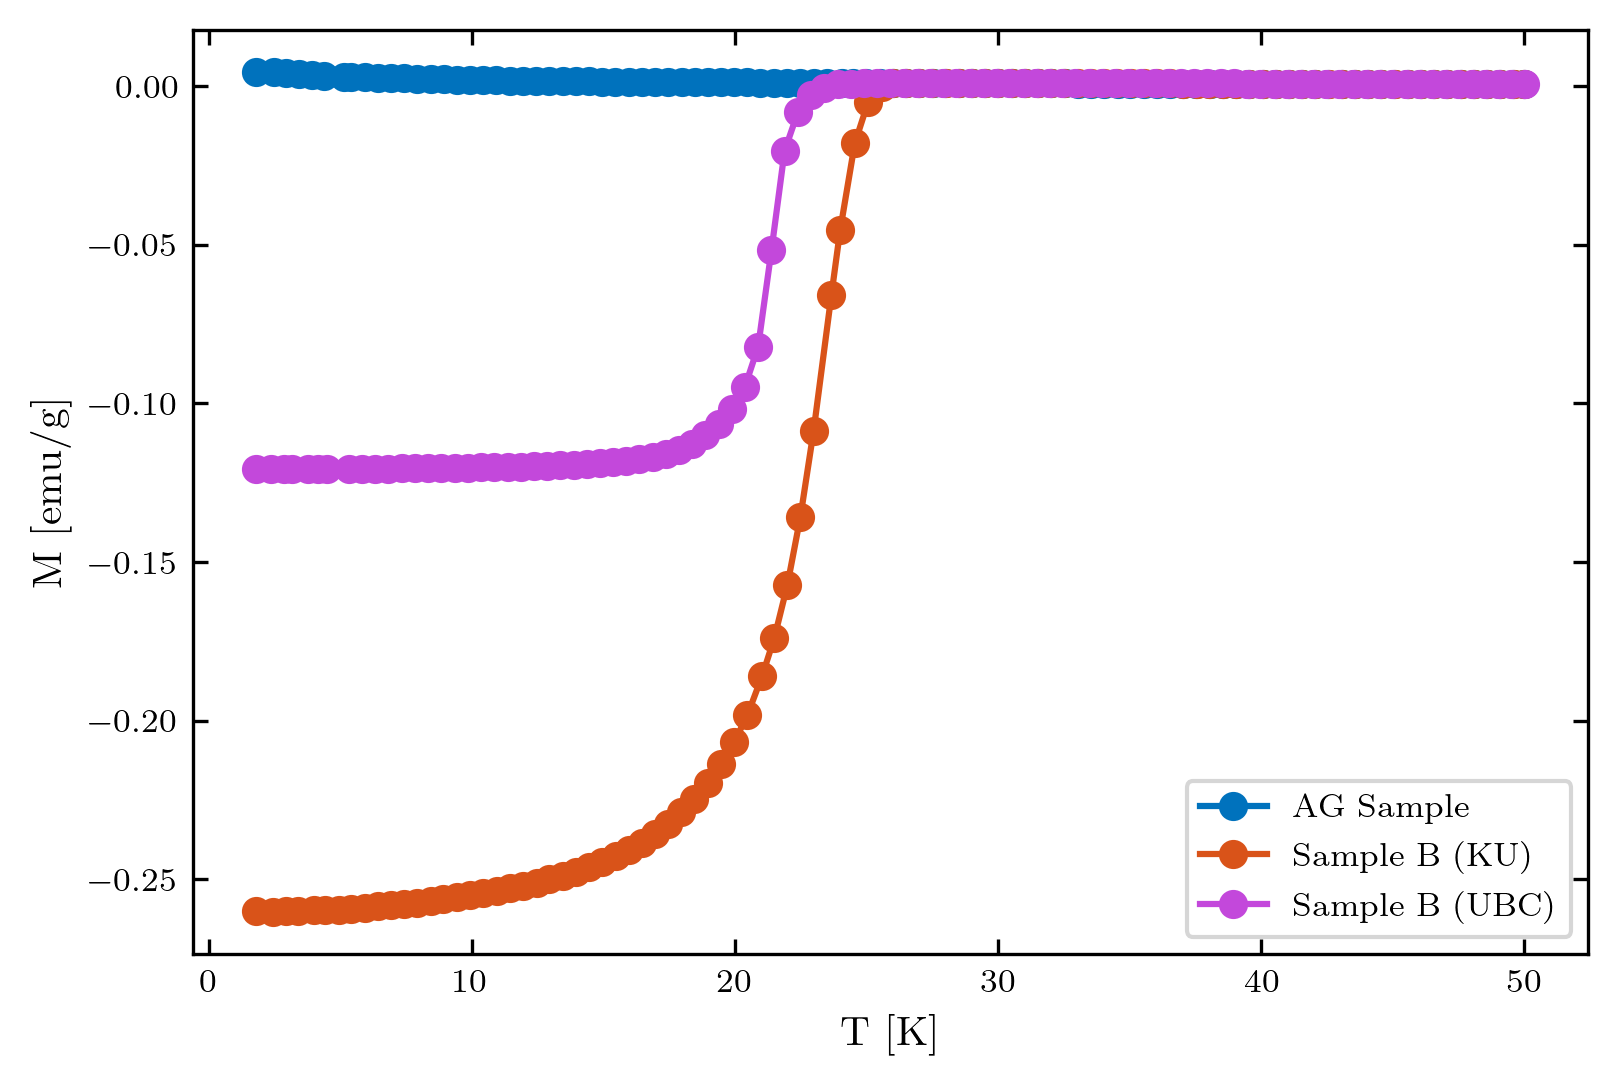

In [4]:
plt.figure(figsize=(6, 4))

plt.plot(Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2], Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2]/ 2.5718, label='AG Sample', marker='o')
plt.plot(KU_sus['Temperature (K)'].iloc[: len(KU_sus) // 2], KU_sus['Long Moment (emu)'].iloc[: len(KU_sus) // 2]/0.0337, label='Sample B (KU)',marker='o')
plt.plot(UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2], UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2]/1.7521, label='Sample B (UBC)',marker='o')
plt.xlabel('T [K]')
plt.ylabel('M [emu/g]')
#plt.grid(linestyle='dotted')
plt.legend()


In [5]:
# Organize the data

ag_sus_T = Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2]
ag_sus_M = Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2] / 2.5718
ag_sus_M_err = Ag_sus['Long Scan Std Dev'].iloc[: len(Ag_sus) // 2] / 2.5718

sc_sus_T = UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2]
sc_sus_M = UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2] / 1.7521
sc_sus_M_err = UBC_sus['Long Scan Std Dev'].iloc[: len(UBC_sus) // 2] / 1.7521

KU_sc_sus_T = KU_sus['Temperature (K)'].iloc[: len(KU_sus) // 2]
KU_sc_sus_M = KU_sus['Long Moment (emu)'].iloc[: len(KU_sus) // 2] /0.0337
KU_sc_sus_M_err = KU_sus['Long Scan Std Dev'].iloc[: len(KU_sus) // 2] /0.0337


# Fit for sample C (UBC annealed)

In [6]:
# Fit T_c for SC
def const(x,k):
    return x*0+k

init_guess_UC = {'k':0} # Initial guess upper constant
init_guess_LC = {'k':-0.12} # Initial guess lower constant

chi_UC = []
chi_LC = []

for i in range(len(sc_sus_T)):
    fit_res_UC = fit(sc_sus_T[i:-1], sc_sus_M[i:-1], sc_sus_M_err[i:-1], const, initial_guess=init_guess_UC)
    chi_UC.append(fit_res_UC.fval)
    fit_res_LC = fit(sc_sus_T[0:i], sc_sus_M[0:i], sc_sus_M_err[0:i], const, initial_guess=init_guess_LC) 
    chi_LC.append(fit_res_LC.fval) 



/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


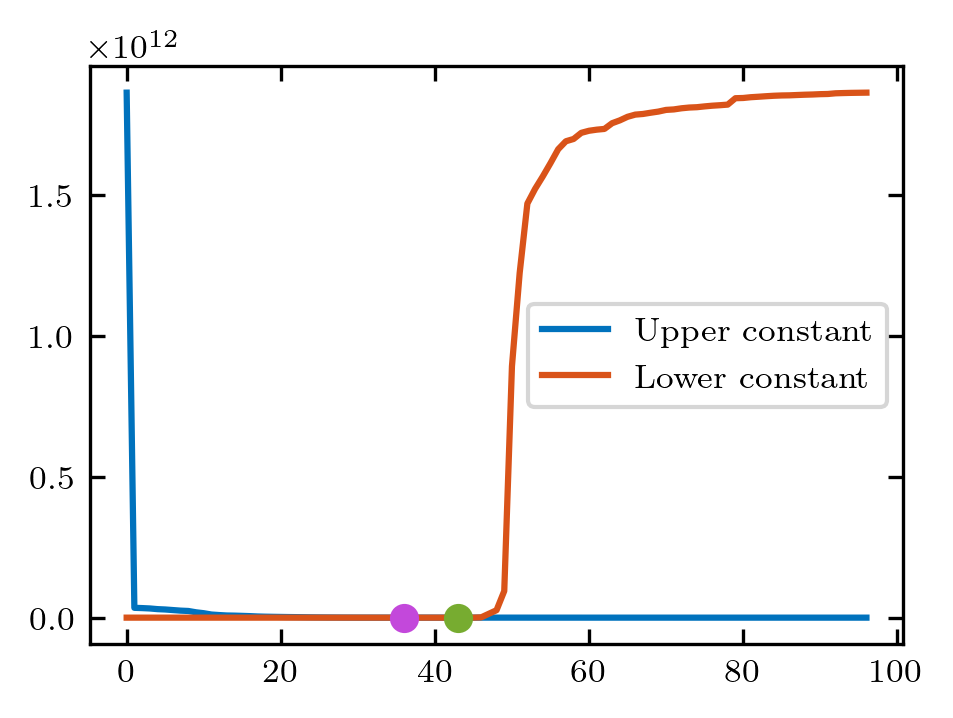

In [7]:
plt.plot(chi_UC, label='Upper constant')
plt.plot(chi_LC, label='Lower constant')
plt.plot(36,0, 'o')
plt.plot(43,0, 'o')
plt.legend()


In [8]:
def slope(x,a,b):
    return a*x+b

U = 43
L = 36

y_latest = np.asarray(sc_sus_M[L:U])
x_latest = np.asarray(sc_sus_T[L:U])

# Estimate slope
a_latest = (y_latest[-1] - y_latest[0]) / (x_latest[-1] - x_latest[0])

# Estimate intercept
b_latest = np.mean(y_latest) - a_latest * np.mean(x_latest)

print(a_latest)
print(b_latest)


init_slope = {'a':a_latest, 'b':b_latest}
trans = fit(sc_sus_T[L:U], sc_sus_M[L:U], sc_sus_M_err[L:U], slope, initial_guess=init_slope)
print(trans.fval)
trans.hesse()


0.03277975254245927
-0.7525459020168075
21861.03658642316


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.186e+04                  │              Nfcn = 50               │
│ EDM = 5.22e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 34.591e-3 │ 0.034e-3  │            │            │         │         │       │
│ 1 │ b    │ -793.1e-3 │  0.7e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 1.15e-09 -24.9e-9 │
│ b │ -24.9e-9 5.39e-07 │
└───┴───────────────────┘

In [9]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

def find_zero_crossing_from_data(x_vals, y_vals, method='brentq'):
    """
    Find the zero crossing from given x and y data points.

    Parameters:
    x_vals (array-like): X values (must be sorted in ascending order).
    y_vals (array-like): Corresponding Y values.
    method (str, optional): Root-finding method. Default is 'brentq'. Other options: 'bisect', 'newton'.

    Returns:
    float: The estimated x-value where y crosses zero.
    """
    # Ensure inputs are NumPy arrays
    x_vals = np.asarray(x_vals)
    y_vals = np.asarray(y_vals)

    # Create an interpolation function
    f_interp = interp1d(x_vals, y_vals, kind='linear', fill_value="extrapolate")

    # Find two x points where y changes sign (bracketing)
    for i in range(len(y_vals) - 1):
        if y_vals[i] * y_vals[i + 1] < 0:  # Change of sign detected
            x_min, x_max = x_vals[i], x_vals[i + 1]
            break
    else:
        raise ValueError("No zero crossing detected in the given data range.")

    # Use root finding to get precise zero crossing
    result = root_scalar(f_interp, bracket=[x_min, x_max], method=method)

    if result.converged:
        return result.root
    else:
        raise RuntimeError("Root finding did not converge.")

x_range_lin = np.linspace(min(sc_sus_T[L:U]-2), max(sc_sus_T[L:U]+2), 100)

zero_x = find_zero_crossing_from_data(x_range_lin, slope(x_range_lin, *trans.values))
print(f"Zero crossing at x = {zero_x:.5f}")

Zero crossing at x = 22.92705


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


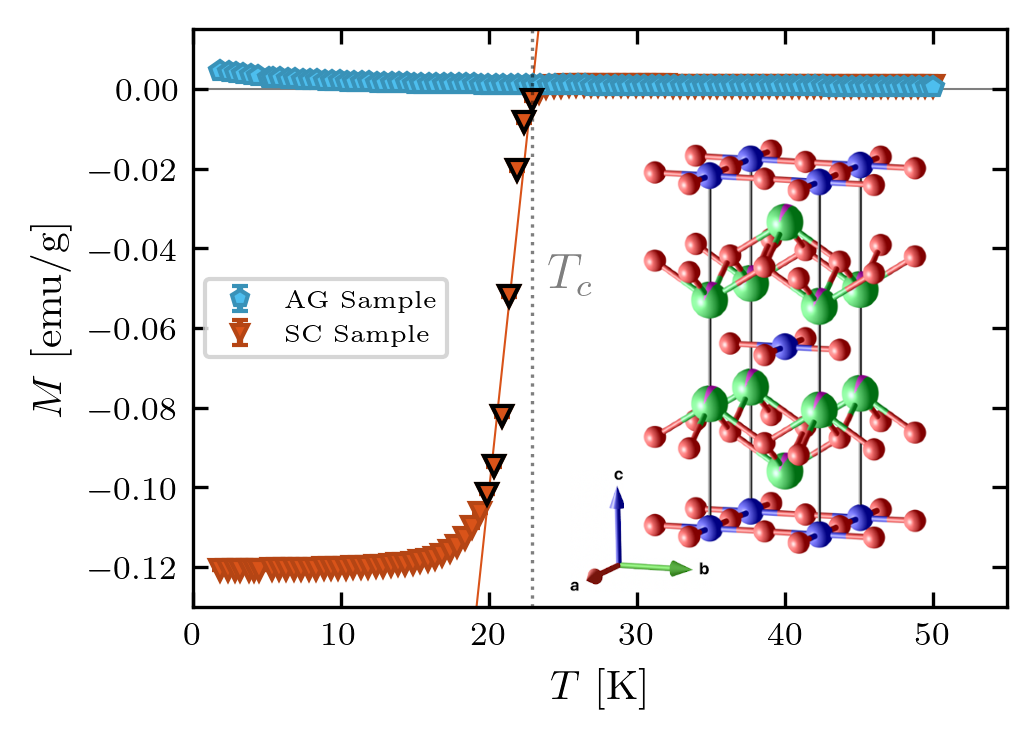

In [10]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Create the main figure
plt.figure()
# Long Scan Std Dev
# Plotting the data
plt.errorbar(ag_sus_T, ag_sus_M, yerr=ag_sus_M_err, label='AG Sample', marker='p', markersize=5, linestyle='none', zorder=3, color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
plt.errorbar(sc_sus_T, sc_sus_M, yerr=sc_sus_M_err, label='SC Sample', marker='v', markersize=5, linestyle='none', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514')


plt.plot(sc_sus_T[L:U], sc_sus_M[L:U], 'v', markersize=5, zorder=4, color='#d95319', mew=1, markeredgecolor='k')
plt.plot(x_range_lin, slope(x_range_lin, *trans.values), '-', color='#D95319', linewidth=0.5)
plt.plot(np.ones(100)*zero_x, np.linspace(-0.13,0.015,100),  linestyle='dotted', color='k', alpha=0.5,linewidth=0.8, zorder=8)
plt.plot(np.linspace(-2,55,100), np.zeros(100),  '-', color='k', linewidth=0.5, alpha=0.5, zorder=2)
plt.text(24, -0.05, '$T_c$', fontsize=12, color='k', alpha=0.5)

# Labels and legend
plt.xlabel('$T$ [K]')
plt.ylabel('$M$ [emu/g]')
plt.legend(loc='center left',fontsize=6, markerscale=0.8)

img_path2 = "Figures_png/akser2.png"  # Replace with your EPS file path
img2 = Image.open(img_path2)           # Load the EPS file
img2.thumbnail((350, 350))            # Adjust the size if necessary       # Load the EPS file

crop_box2 = (3, 6, 500, 300)
cropped_img2 = img2.crop(crop_box2)

# Resize the cropped image if necessary
cropped_img2.thumbnail((500, 300)) 

# Insert the cropped image as an inset
imagebox2 = OffsetImage(cropped_img2, zoom=0.1)  # Adjust zoom level as needed
ab2 = AnnotationBbox(imagebox2, (0.59, 0.13),  # (x, y) position in axes fraction
                    xycoords='axes fraction', frameon=False)
plt.gca().add_artist(ab2)  # Add the inset to the current axis


# Load the EPS file
img_path = "Figures_png/NCCO_crystal3.png"  # Replace with your EPS file path
img = Image.open(img_path)           # Load the EPS file
img.thumbnail((550, 550))

# Define the crop box (left, upper, right, lower) in pixels
# Adjust these coordinates to fit the part of the image you want to crop
crop_box = (150, 0, 550, 510)
cropped_img = img.crop(crop_box)

# Resize the cropped image if necessary
cropped_img.thumbnail((500, 500))  # Adjust the size as needed

# Insert the cropped image as an inset
imagebox = OffsetImage(cropped_img, zoom=0.2)  # Adjust zoom level as needed
ab = AnnotationBbox(imagebox, (0.73, 0.45),  # (x, y) position in axes fraction
                    xycoords='axes fraction', frameon=False)
plt.gca().add_artist(ab)  # Add the inset to the current axis


plt.ylim(-0.13,0.015)
plt.xlim(0,55)

plt.savefig('Figures_png/SQUID/SQUID_data.png', format='png', bbox_inches='tight')
plt.savefig('Figures_eps/SQUID/SQUID_data.eps', format='eps', bbox_inches='tight')


# Fit for the sample B (KU annealed sampel)

In [11]:
init_guess_UC_KU = {'k':0} # Initial guess upper constant
init_guess_LC_KU = {'k':-0.009} # Initial guess lower constant

chi_UC_KU = []
chi_LC_KU = []

for i in range(len(KU_sc_sus_T)):
    fit_res_UC_KU = fit(KU_sc_sus_T[i:-1], KU_sc_sus_M[i:-1], KU_sc_sus_M_err[i:-1], const, initial_guess=init_guess_UC_KU)
    chi_UC_KU.append(fit_res_UC_KU.fval)
    fit_res_LC_KU = fit(KU_sc_sus_T[0:i], KU_sc_sus_M[0:i], KU_sc_sus_M_err[0:i], const, initial_guess=init_guess_LC_KU) 
    chi_LC_KU.append(fit_res_LC_KU.fval) 


/Users/kristinekrighaar/Documents/KGS/KGS/fitting.py:302: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


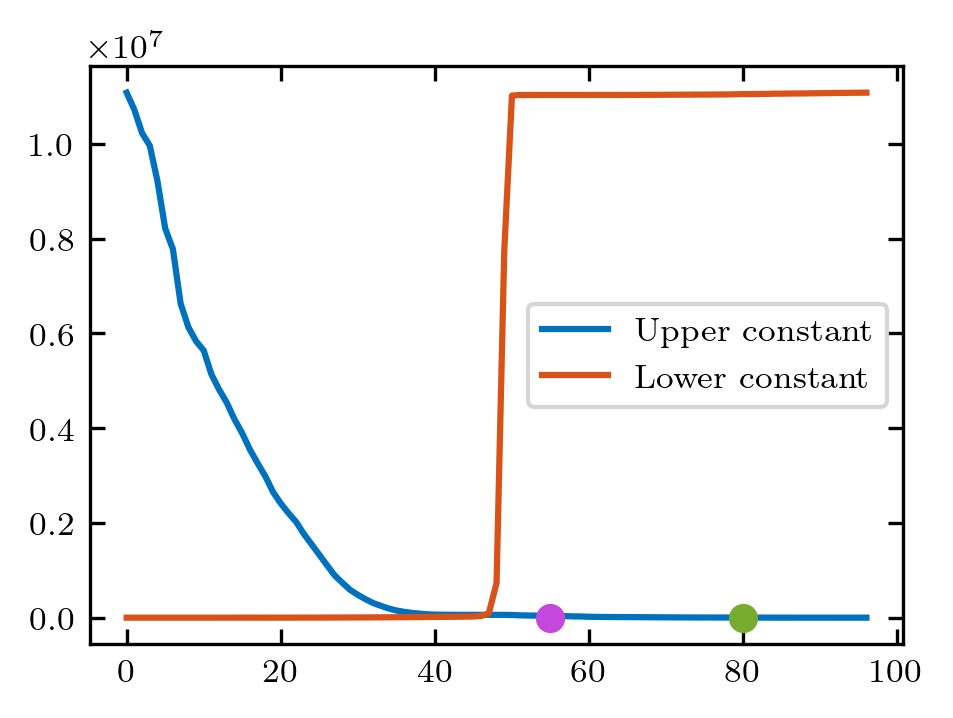

In [12]:
plt.plot(chi_UC_KU, label='Upper constant')
plt.plot(chi_LC_KU, label='Lower constant')
plt.plot(55,0, 'o')
plt.plot(80,0, 'o')
plt.legend()

In [13]:

U_KU = 48
L_KU = 38

y_latest_KU = np.asarray(KU_sc_sus_M[L:U])
x_latest_KU = np.asarray(KU_sc_sus_T[L:U])

# Estimate slope
a_latest_KU = (y_latest_KU[-1] - y_latest_KU[0]) / (x_latest_KU[-1] - x_latest_KU[0])

# Estimate intercept
b_latest_KU = np.mean(y_latest) - a_latest * np.mean(x_latest)

print(a_latest_KU)
print(b_latest_KU)


init_slope_KU = {'a':a_latest_KU, 'b':b_latest_KU}
trans_KU= fit(KU_sc_sus_T[L_KU:U_KU], KU_sc_sus_M[L_KU:U_KU], KU_sc_sus_M_err[L_KU:U_KU], slope, initial_guess=init_slope_KU)
print(trans_KU.fval)
trans_KU.hesse()


0.032539977912083885
-0.7525459020168075
387.5870827188625


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 387.6                      │              Nfcn = 57               │
│ EDM = 8.73e-16 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 41.12e-3  │  0.27e-3  │            │            │         │         │       │
│ 1 │ b    │  -1.050   │   0.007   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 7.33e-08 -1.85e-6 │
│ b │ -1.85e-6 4.67e-05 │
└───┴───────────────────┘

In [14]:
x_range_lin_KU = np.linspace(min(KU_sc_sus_T[L_KU:U_KU]-2), max(KU_sc_sus_T[L_KU:U_KU]+2), 100)

zero_x_KU = find_zero_crossing_from_data(x_range_lin_KU, slope(x_range_lin_KU, *trans_KU.values))
print(f"Zero crossing at x = {zero_x_KU:.5f}")


Zero crossing at x = 25.53629


## Plot for the SM 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


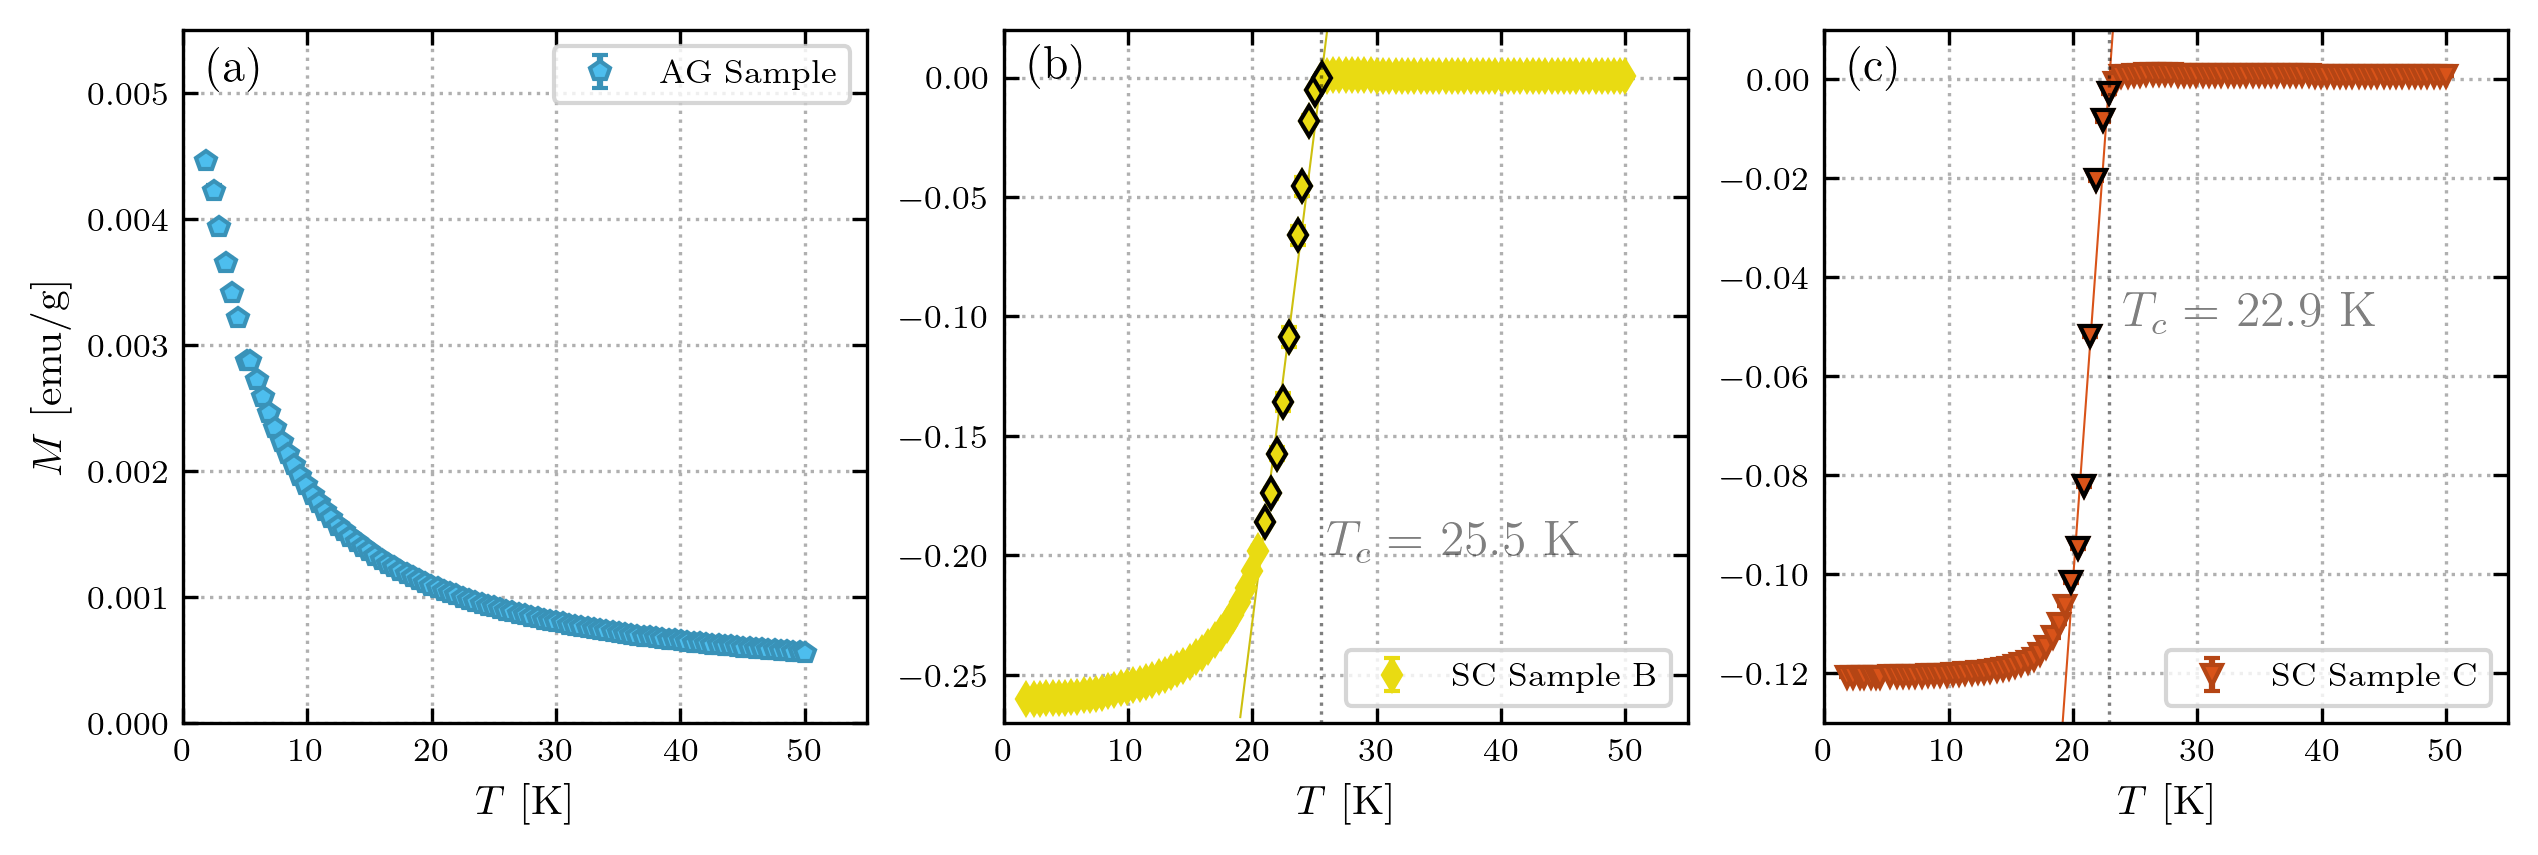

In [16]:
# Create a figure with three subplots arranged vertically
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Plot each sample in a separate subplot
# Sample A
#axes[0].plot(Ag_sus['Temperature (K)'].iloc[: len(Ag_sus) // 2], Ag_sus['Long Moment (emu)'].iloc[: len(Ag_sus) // 2], label='Sample A (AG)', marker='o')
axes[0].errorbar(ag_sus_T, ag_sus_M, yerr=ag_sus_M_err, label='AG Sample', marker='p', markersize=5, linestyle='none', zorder=3, color='#4dbeee', ecolor='#3992b8', mew=1, markeredgecolor='#3992b8')
axes[0].set_ylabel('$M$ [emu/g]')
axes[0].set_xlabel('$T$ [K]')
axes[0].set_ylim(0,0.0055)
axes[0].set_xlim(0,55)
axes[0].text(2, 0.0051, r"(a)", fontsize=11, color="black")
axes[0].legend()
axes[0].grid(linestyle='dotted')

# Sample B
axes[1].errorbar(KU_sc_sus_T, KU_sc_sus_M, yerr=KU_sc_sus_M_err, label='SC Sample B', marker='d', markersize=5, linestyle='none', color='#e9db12')
axes[1].plot(KU_sc_sus_T[L_KU:U_KU], KU_sc_sus_M[L_KU:U_KU], 'd', markersize=5, zorder=4, color="#e9db12", mew=1, markeredgecolor='k')
#axes[1].plot(np.linspace(-2,55,100), np.zeros(100),  '-', color='k', linewidth=0.5, alpha=0.5, zorder=2)
axes[1].plot(x_range_lin_KU, slope(x_range_lin_KU, *trans_KU.values), '-', color="#cdc00f", linewidth=0.5)
axes[1].plot(np.ones(100)*zero_x_KU, np.linspace(-0.27,0.02,100),  linestyle='dotted', color='k', alpha=0.5,linewidth=0.8, zorder=8)
axes[1].text(26.0, -0.2, f'$T_c =$ {zero_x_KU:.1f} K', fontsize=12, color='k', alpha=0.5)
axes[1].set_xlabel('$T$ [K]')
axes[1].set_xlim(0,55)
axes[1].set_ylim(-0.27,0.02)
axes[1].text(2, 0, r"(b)", fontsize=11, color="black")
axes[1].legend()
axes[1].grid(linestyle='dotted')

# Sample C
axes[2].errorbar(sc_sus_T, sc_sus_M, yerr=sc_sus_M_err, label='SC Sample C', marker='v', markersize=5, linestyle='none', color='#d95319', ecolor='#b54514', mew=1, markeredgecolor='#b54514')
axes[2].plot(sc_sus_T[L:U], sc_sus_M[L:U], 'v', markersize=5, zorder=4, color='#d95319', mew=1, markeredgecolor='k')
axes[2].plot(x_range_lin, slope(x_range_lin, *trans.values), '-', color='#D95319', linewidth=0.5)
axes[2].set_ylim(-0.13,0.01)
axes[2].set_xlim(0,55)
#axes[2].text(2, 1.55, r"(c)", fontsize=11, color="black")
axes[2].plot(np.ones(100)*zero_x, np.linspace(-0.13,0.015,100),  linestyle='dotted', color='k', alpha=0.5,linewidth=0.8, zorder=8)
#axes[2].plot(np.linspace(-2,55,100), np.zeros(100),  '-', color='k', linewidth=0.5, alpha=0.5, zorder=2)
axes[2].text(24, -0.05, f'$T_c=$ {zero_x:.1f} K', fontsize=12, color='k', alpha=0.5)
#axes[2].plot(UBC_sus['Temperature (K)'].iloc[: len(UBC_sus) // 2], UBC_sus['Long Moment (emu)'].iloc[: len(UBC_sus) // 2], label='Sample C (SC)', marker='o', color='green')
axes[2].set_xlabel('$T$ [K]')
axes[2].legend()
axes[2].grid(linestyle='dotted')
axes[2].text(2, 0, r"(c)", fontsize=11, color="black")

# Add a title to the entire figure (optional)
#fig.suptitle("Magnetic Moment vs Temperature for Different Samples", fontsize=14)
plt.savefig('Figures_png/SQUID/Raw_SQUID_data.png', format='png', bbox_inches='tight')
plt.savefig('Figures_eps/SQUID/Raw_SQUID_data.eps', format='eps', bbox_inches='tight')

# Display the plot